# Table of contents
1. [Introduction](#introduction)
2. [Project Description](#paragraph1)
3. [Description of the data](#paragraph2)
4. [Work Plan](#paragraph3)

    
## Introduction <a name="introduction"></a>
Final Project for Yandex Practicum Course 
    
## Project Description <a name="paragraph1"></a>

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

### Interconnect's services

Interconnect mainly provides two types of services:

1. Landline communication. The telephone can be connected to several lines simultaneously.
2. Internet. The network can be set up via a telephone line (DSL, *digital subscriber line*) or through a fiber optic cable.

Some other services the company provides include:

- Internet security: antivirus software (*DeviceProtection*) and a malicious website blocker (*OnlineSecurity*)
- A dedicated technical support line (*TechSupport*)
- Cloud file storage and data backup (*OnlineBackup*)
- TV streaming (*StreamingTV*) and a movie directory (*StreamingMovies*)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.



## Description of the data <a name="paragraph2"></a>

The data consists of files obtained from different sources:

- `contract.csv` — contract information
- `personal.csv` — the client's personal data
- `internet.csv` — information about Internet services
- `phone.csv` — information about telephone services

In each file, the column `customerID` contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.


In [1]:
#Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [2]:
try:
    df_contract = pd.read_csv('contract.csv')
    df_personal = pd.read_csv('personal.csv')
    df_internet = pd.read_csv('internet.csv')
    df_phone = pd.read_csv('phone.csv')
except:
    df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
    df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
    df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
    df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

#### Contract

In [3]:
df_contract.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15


In [4]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
df_contract.describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
df_contract.duplicated().sum()

0

In [7]:
df_contract['customerID'].nunique()

7043

#### Personal

In [8]:
df_personal.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No


In [9]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [10]:
df_personal.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0


In [11]:
df_personal.duplicated().sum()

0

In [12]:
df_personal['customerID'].nunique()

7043

#### Internet

In [13]:
df_internet.head(3)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No


In [14]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [15]:
df_internet.describe().T

,count,unique,top,freq
customerID,5517,5517,7361-YPXFS,1
InternetService,5517,2,Fiber optic,3096
OnlineSecurity,5517,2,No,3498
OnlineBackup,5517,2,No,3088
DeviceProtection,5517,2,No,3095
TechSupport,5517,2,No,3473
StreamingTV,5517,2,No,2810
StreamingMovies,5517,2,No,2785


In [16]:
df_personal.duplicated().sum()

0

#### Phone

In [17]:
df_phone.head(3)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No


In [18]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [19]:
df_phone.duplicated().sum()

0

In [20]:
df_phone['customerID'].nunique()

6361

### Quick considerations

 - no missing values
 - no duplicates
 - data type to be converted to appropiate ones
 - do a better analysis to understand if all columns are needed
 - data can be merged by customerID

## Work Plan <a name="paragraph3"></a>

    

- 1. EDA:

    + Change data types.
    + Merge tables by customerID.
    + Deal with null values after merge
    + Build up visuals to analyse data (Histogram, boxplot, etc.).
    + See correlations between parameters.
    + See trends.
    + Delete irrelevant columns.   
    

- 2. Training models:

    + Check if data is balanced and if needed balance it.
    + Create training models.
    

- 3. Optimization:

    + Tune Hyperparameters.
    + Check Cross Validation.
    
    
- 4. Final Testing

    + Choose the best model.
    + Run best model with test data.
    + Provide ROC AUC Score of the best model.


- 5. Summary

    + Written conclusion of the report.

## EDA

+ Since the data is received in 4 files, first step is to join all the datasets in one, joining the datasets by ‘customerID’. 

In [21]:
dfs = [df_contract, df_personal, df_internet, df_phone]

In [22]:
dfs = [df.set_index('customerID') for df in dfs]
df_all = dfs[0].join(dfs[1:])

In [23]:
df_all.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [24]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   5517 non-null   object 
 12  OnlineSecurity    5517 non-null   object 
 13  OnlineBackup      5517 non-null   object 
 14  DeviceProtection  5517 non-null   object 
 15  TechSupport       5517 non-null   object 
 16  StreamingTV       5517 non-null 

In [25]:
df_all = df_all.rename_axis('customerID').reset_index()

In [26]:
df_all.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [27]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


+ After joining the datasets, the final dataset resulted in one with a high number of null values. Since the null values present in some columns represent more them 20% of the information, it was considered that the best approach was fill in those cells and not drop de rows with null values because it could delete relevant information.
+ It was assumed that clients with null service is because that they don’t have internet or phone service, and therefore the cells were fill in with information accordingly to that.
+ For client with null total charges, it was fill in with their monthly charge, since they all are new clients. 
+ It was also converted the data types accordingly with the information that they provide, in our case, date related.

In [28]:
df_all.duplicated().sum()

0

In [29]:
df_all['customerID'].nunique()

7043

In [30]:
df_all.isnull().sum() / len(df_all) * 100

customerID           0.000000
BeginDate            0.000000
EndDate              0.000000
Type                 0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
InternetService     21.666903
OnlineSecurity      21.666903
OnlineBackup        21.666903
DeviceProtection    21.666903
TechSupport         21.666903
StreamingTV         21.666903
StreamingMovies     21.666903
MultipleLines        9.683374
dtype: float64

In [31]:
for col in df_all:
    print(df_all[col].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['2020-01-01' '2017-04-01' '2019-10-01' '2016-05-01' '2019-09-01'
 '2019-03-01' '2018-04-01' '2019-04-01' '2017-07-01' '2014-12-01'
 '2019-01-01' '2018-10-01' '2015-04-01' '2015-09-01' '2018-01-01'
 '2014-05-01' '2015-10-01' '2014-03-01' '2018-05-01' '2019-11-01'
 '2019-02-01' '2016-01-01' '2017-08-01' '2015-12-01' '2014-02-01'
 '2018-06-01' '2019-12-01' '2017-11-01' '2019-06-01' '2016-04-01'
 '2017-02-01' '2018-12-01' '2014-04-01' '2018-09-01' '2014-11-01'
 '2016-07-01' '2015-02-01' '2018-07-01' '2014-08-01' '2016-03-01'
 '2018-08-01' '2014-10-01' '2015-06-01' '2016-08-01' '2019-05-01'
 '2017-03-01' '2016-02-01' '2017-09-01' '2014-09-01' '2017-12-01'
 '2016-12-01' '2017-06-01' '2015-05-01' '2016-10-01' '2016-09-01'
 '2019-08-01' '2019-07-01' '2017-05-01' '2017-10-01' '2014-07-01'
 '2018-03-01' '2015-01-01' '2018-11-01' '2015-03-01' '2018-02-01'
 '2016-06-01' '2015-08-01' '2015-11-01' '2014-06-01' '201

In [32]:
for col in ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines"]:
    df_all[col] = df_all[col].fillna("No")

In [33]:
df_all['InternetService'] = df_all['InternetService'].fillna("no_service")

In [34]:
df_all.isnull().sum() / len(df_all) * 100

customerID          0.0
BeginDate           0.0
EndDate             0.0
Type                0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
MultipleLines       0.0
dtype: float64

In [35]:
df_all['BeginDate'] = pd.to_datetime(df_all['BeginDate'], format='%Y-%m-%dT%H:%M:%S')
df_all['BeginMonth'] = pd.DatetimeIndex(df_all['BeginDate']).month

In [36]:
df_all['TotalCharges'] = pd.to_numeric(df_all['TotalCharges'], errors='coerce')

In [37]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

In [38]:
df_temp = df_all.query("TotalCharges != TotalCharges")

In [39]:
df_temp.head(15)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,BeginMonth
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,No,2
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN,Male,0,No,Yes,no_service,No,No,No,No,No,No,No,2
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No,2
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN,Male,0,Yes,Yes,no_service,No,No,No,No,No,No,Yes,2
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,No,2
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN,Male,0,Yes,Yes,no_service,No,No,No,No,No,No,No,2
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN,Male,0,Yes,Yes,no_service,No,No,No,No,No,No,Yes,2
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN,Female,0,Yes,Yes,no_service,No,No,No,No,No,No,No,2
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN,Male,0,Yes,Yes,no_service,No,No,No,No,No,No,No,2
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes,2


In [40]:
df_all['TotalCharges'] = df_all['TotalCharges'].fillna(df_all['MonthlyCharges'])

In [41]:
df_all.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,BeginMonth
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,1
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,4
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,10
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,5
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,9


+ Categorical variables were converted In Numerical variables in binary, ternary and quaternary.

In [42]:
mapping = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Month-to-month': 0, 
           'One year': 1, 'Two year': 2, 
          'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2,
 'Credit card (automatic)': 3, 'DSL': 0, 'Fiber optic': 1, 'no_service': 2}

In [43]:
df_all = df_all.replace({'Type': mapping, 'PaymentMethod': mapping, 'InternetService': mapping, 'PaperlessBilling': mapping, 'gender': mapping, 'Partner': mapping, 
                'Dependents': mapping, 'OnlineSecurity': mapping, 'OnlineBackup': mapping, 'DeviceProtection': mapping, 
               'TechSupport': mapping, 'StreamingTV': mapping, 'StreamingMovies': mapping, 'MultipleLines': mapping})

In [44]:
df_all.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,BeginMonth
0,7590-VHVEG,2020-01-01,No,0,1,0,29.85,29.85,0,0,1,0,0,0,1,0,0,0,0,0,1
1,5575-GNVDE,2017-04-01,No,1,0,1,56.95,1889.50,1,0,0,0,0,1,0,1,0,0,0,0,4
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,0,1,1,53.85,108.15,1,0,0,0,0,1,1,0,0,0,0,0,10
3,7795-CFOCW,2016-05-01,No,1,0,2,42.30,1840.75,1,0,0,0,0,1,0,1,1,0,0,0,5
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,0,1,0,70.70,151.65,0,0,0,0,1,0,0,0,0,0,0,0,9


In [45]:
df_all['Churn'] = df_all['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

In [46]:
cols_01 = df_all[['BeginDate', 'BeginMonth', 'Type', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

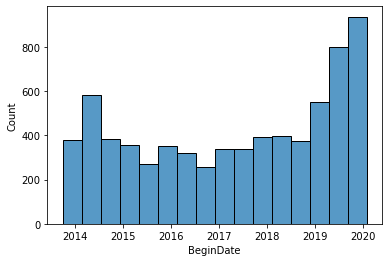

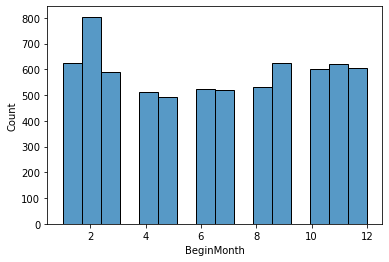

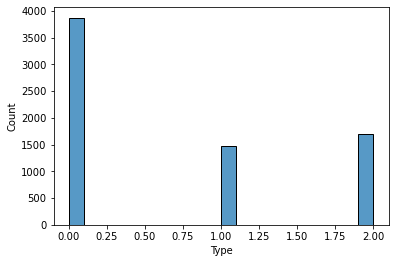

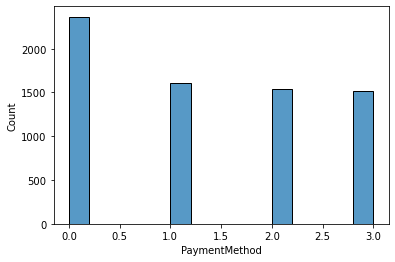

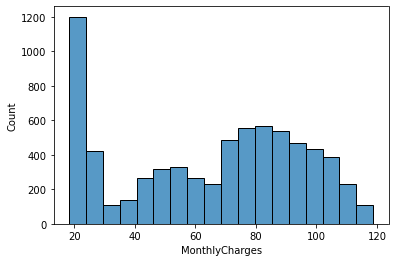

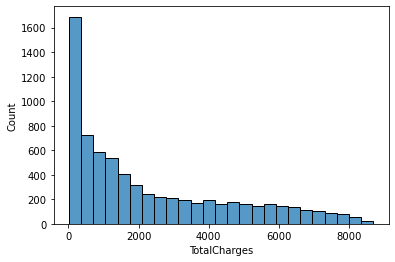

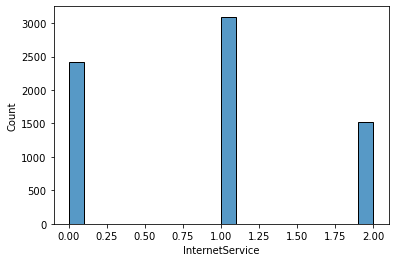

In [47]:
# create histplots
for column in df_all[['BeginDate', 'BeginMonth', 'Type', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'InternetService']]:
    plt.figure()             # <==================== here!
    sns.histplot(df_all[column], bins = "auto")

+ From the Histograms it able to retain that in the last clients are raising since 2019. 
+ Most of the contracts are monthly factored.
+ Most of the clients have plans with low charges.

In [48]:
cols = ["SeniorCitizen", "gender", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines"]

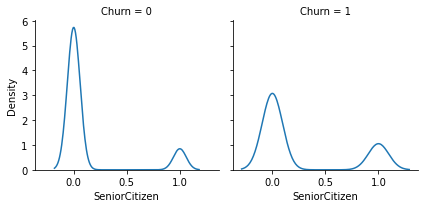

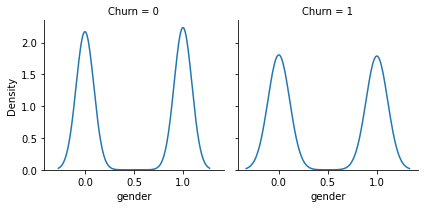

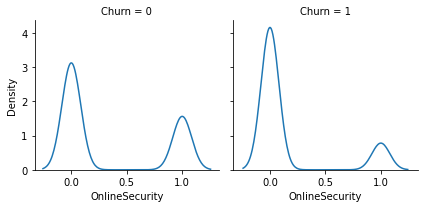

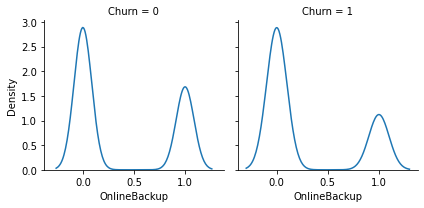

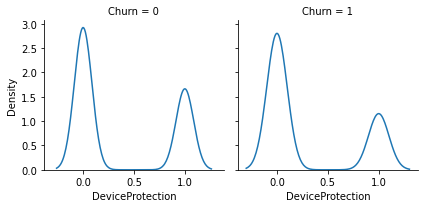

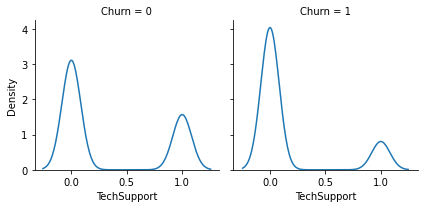

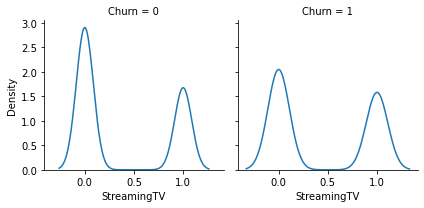

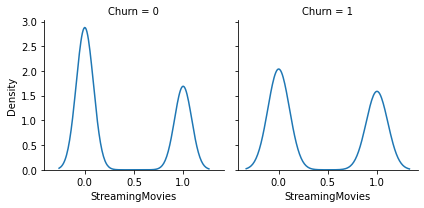

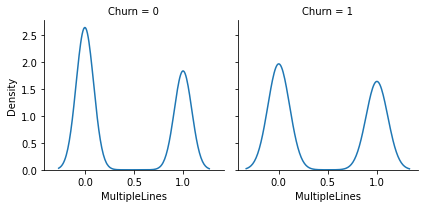

In [49]:
for co in cols:
    g = sns.FacetGrid(df_all, col='Churn')
    g.map(sns.kdeplot, co)
plt.show()

+ For this case, the density charts don’t offer much information. Since they are very similar for clients that left the company and clients that left. The ones that stand out more are the one regarding Online Security and Tech Support, where can be seen that not having this 2 services might impact the decision of the client abandoning the service.

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decomp(data, columns):
    
    data = data.groupby(columns).size()
      
    decomposed = seasonal_decompose(data)
    plt.figure(figsize=(10,10))

    plt.subplot(311)
    decomposed.trend.plot(ax=plt.gca())
    plt.title('Trend')

    plt.subplot(312)
    decomposed.seasonal.plot(ax=plt.gca())
    plt.title('Seasonality')
    
    plt.subplot(313)
    decomposed.resid.plot(ax=plt.gca())
    plt.title('Residuals')
    
    plt.tight_layout()

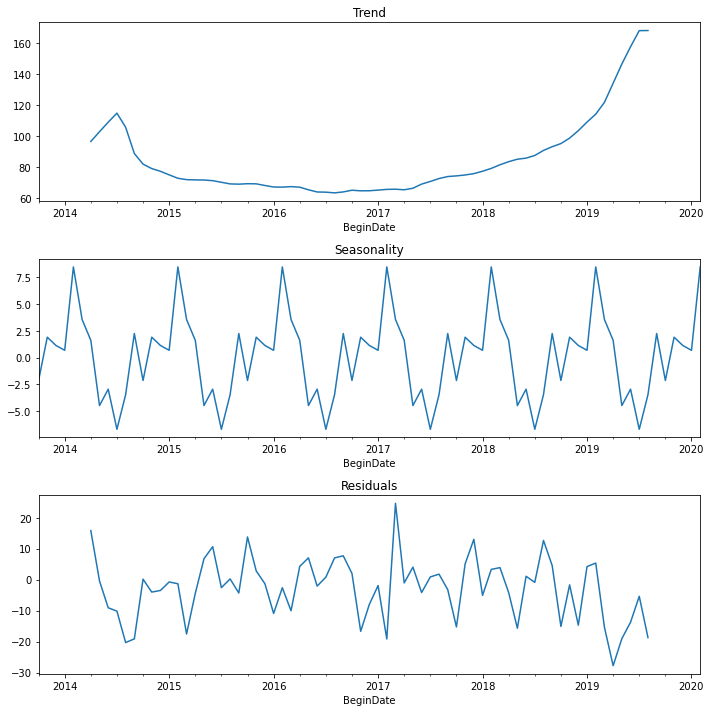

In [52]:
decomp(df_all, ['BeginDate'])

In [54]:
df_all['EndDate'].unique()

array(['No', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

+ Regarding trend and seasonality, the service is growing, and expectations that it keeps growing, at least in the immediate future. 
+ Also it’s able to observe, that the beginning of the years are more interesting to capture new clients.
+ This type of study isn’t possible to be done regarding the end date, since we only start having clients to leave in the past few months.

<AxesSubplot:ylabel='MonthlyCharges'>

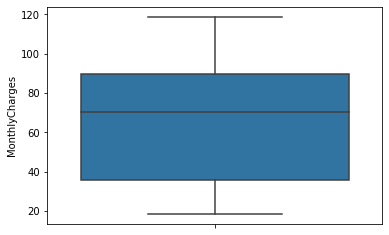

In [55]:
sns.boxplot(y="MonthlyCharges",data=df_all)

<AxesSubplot:ylabel='TotalCharges'>

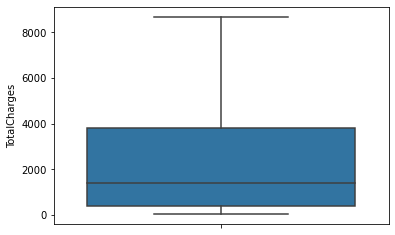

In [56]:
sns.boxplot(y="TotalCharges",data=df_all)

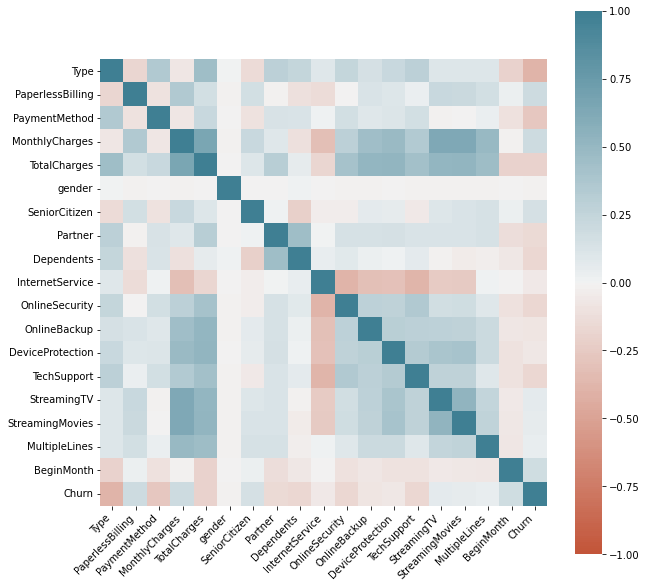

In [57]:
corr = df_all.drop(['BeginDate', 'EndDate'], axis=1).corr()

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [58]:
corr_churn = df_all.corr()
corr_churn.iloc[corr_churn['Churn'].abs().argsort()]["Churn"]

gender             -0.008612
MultipleLines       0.040102
InternetService    -0.047291
StreamingMovies     0.061382
StreamingTV         0.063228
DeviceProtection   -0.066160
OnlineBackup       -0.082255
Partner            -0.150448
SeniorCitizen       0.150889
Dependents         -0.164221
TechSupport        -0.164674
OnlineSecurity     -0.171226
BeginMonth          0.181417
PaperlessBilling    0.191825
MonthlyCharges      0.193356
TotalCharges       -0.198347
PaymentMethod      -0.262818
Type               -0.396713
Churn               1.000000
Name: Churn, dtype: float64

+ Correlation between features isn’t very strong, only “Type” pops out as the strongest correlation, and even like that with a modest figure of -0.4

In [59]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
"""
sc = MinMaxScaler()
df_all['MonthlyCharges'] = sc.fit_transform(df_all[['MonthlyCharges']])
df_all['TotalCharges'] = sc.fit_transform(df_all[['TotalCharges']])
"""

"\nsc = MinMaxScaler()\ndf_all['MonthlyCharges'] = sc.fit_transform(df_all[['MonthlyCharges']])\ndf_all['TotalCharges'] = sc.fit_transform(df_all[['TotalCharges']])\n"

## Training models

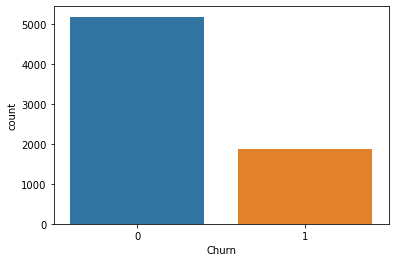

In [60]:
ax = sns.countplot(x='Churn', data=df_all)
plt.show()

+ Class is unbalanced, representing a risk for our training model, resulting in a model with an unrealistic accuracy.

In [61]:
target = df_all['Churn']
features = df_all.drop(columns=['Churn','customerID', 'EndDate', 'BeginDate', 'BeginMonth'], axis=1)

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    features, target, test_size=0.3, random_state=12345
)


In [64]:
from sklearn.pipeline import Pipeline

#transform columns
#num_cols = numerical columns

num_cols = ['MonthlyCharges', 'TotalCharges']
preprocessor = ColumnTransformer(transformers = [('scaler',StandardScaler(), num_cols)])

#model pipeline
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('svc', SVC())])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['MonthlyCharges',
                                                   'TotalCharges'])])),
                ('svc', SVC())])

In [65]:
model_pipeline.score(X_valid, y_valid)

0.7818267865593942

In [68]:
X_train[['MonthlyCharges', 'TotalCharges']] = pd.DataFrame(preprocessor.fit_transform(X_train), columns=X_train[['MonthlyCharges', 'TotalCharges']].columns, index=X_train[['MonthlyCharges', 'TotalCharges']].index)

In [69]:
X_train.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
99,0,1,0,1.115250,0.093985,0,1,1,0,1,0,1,1,0,1,1,0
5684,1,1,3,1.346920,1.723576,0,1,1,0,1,1,1,0,1,1,1,0
4627,1,1,3,1.714281,2.096205,1,0,0,0,1,1,1,1,1,1,1,1
629,0,0,3,0.835592,0.991452,1,1,1,0,1,0,1,0,0,0,1,1
4084,0,0,0,0.438444,-0.981717,0,0,0,0,1,0,0,0,0,1,0,0


In [71]:
X_valid[['MonthlyCharges', 'TotalCharges']] = pd.DataFrame(preprocessor.fit_transform(X_valid), columns=X_valid[['MonthlyCharges', 'TotalCharges']].columns, index=X_valid[['MonthlyCharges', 'TotalCharges']].index)

In [72]:
X_valid.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
1128,0,1,0,-1.519646,-0.748676,1,0,0,0,2,0,0,0,0,0,0,0
2875,0,1,0,0.685942,-0.156504,1,0,1,0,1,0,0,0,0,0,1,1
1783,0,1,0,0.234417,-0.950553,1,0,0,1,1,0,0,0,0,0,0,0
3804,0,0,0,0.509696,-0.630827,1,0,0,0,1,0,1,0,0,0,0,1
6087,1,1,2,-0.829770,-0.531023,1,0,0,1,0,0,1,0,0,1,0,0


+ Data normalization applied to the numeric columns, in order to provide same scale for the column values.

In [73]:
# imbalance ratio 

ratio = round(((y_train == 0).sum() / (y_train == 1).sum()),0).astype(int)
ratio

3

In [74]:
from sklearn.utils import shuffle

# upsampling to deal with imbalance class

# X = features
# Y = target

def upsample(features, target, repeat):

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


In [75]:
X_upsampled, Y_upsampled = upsample(
    X_train, y_train, ratio
)

In [76]:
X_train, y_train = X_upsampled, Y_upsampled

In [77]:
df_ax = X_upsampled.copy()
df_ax['Churn'] = Y_upsampled.values
df_ax.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn
1232,0,0,0,0.446718,0.115972,1,0,1,1,1,0,0,0,0,1,0,0,1
666,0,0,0,0.160441,-0.952092,0,0,0,0,1,0,0,0,0,0,0,0,1
834,0,1,0,0.464921,-0.886904,0,1,0,0,1,0,0,0,0,1,0,0,1
5333,0,0,0,0.779329,-0.476305,0,0,1,1,1,0,0,0,0,1,1,0,1
1393,0,0,1,-1.471174,-1.007191,0,0,0,0,2,0,0,0,0,0,0,0,0


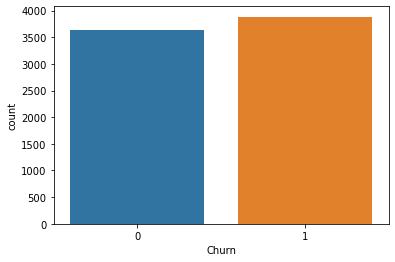

In [78]:
ax = sns.countplot(x='Churn', data=df_ax)
plt.show()

+ Class was balance using upscaling with a ratio of 3. Upscaling all dataset might lead to overly optimistic results, but for simplify this case, it was decided to procced this way.

In [79]:
import warnings
warnings.filterwarnings("ignore")

models = []

models.append(('dummy_classifier', DummyClassifier(random_state = 12345, strategy='most_frequent')))
models.append(('gradient_boosting', GradientBoostingClassifier(random_state = 12345)))
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 12345,
                                                         class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 12345)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 12345)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 12345)))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 12345)))

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ['Model', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='accuracy')
    
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                            round(cv_auc_results.mean()*100, 2),
                            round(cv_auc_results.std()*100, 2),
                            round(cv_acc_results.mean()*100, 2),
                            round(cv_acc_results.std()*100, 2)
                            ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Model,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
7,Random Forest,98.31,0.32,91.98,0.99
6,Decision Tree Classifier,90.32,1.31,90.45,1.53
1,gradient_boosting,86.68,1.20,78.88,1.39
4,Kernel SVM,85.46,1.39,77.94,1.58
2,Logistic Regression,83.92,1.34,76.40,1.47
3,SVC,83.74,1.52,76.05,1.49
5,KNN,83.73,1.31,72.43,1.77
0,dummy_classifier,50.00,0.00,51.66,1.58


+ After training a couple of models, Random Forest outperformed all other models with a mean AUC Score of 98.31. I would say that the score is too high and something might had skewed our data in order to provide such a high score. Still models need to be Optimize and tested with the Validation Data. 

## Optimization

In [80]:
# define the parameter grid
metrics = ['euclidean','manhattan'] 
grid_parameters  = dict(metric=metrics, n_neighbors=range(1, 20))


# define the RandomizedSearchCV class for trying different parameter combinations
random_search_KNN = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search_KNN.fit(X_train, y_train)

# print best parameter after tuning
print(random_search_KNN.best_params_)

{'n_neighbors': 1, 'metric': 'euclidean'}


In [81]:
# define the parameter grid
grid_parameters = { 'n_estimators': range(1, 100)}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search_RF = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search_RF.fit(X_train, y_train)

# print best parameter after tuning
print(random_search_RF.best_params_)

{'n_estimators': 72}


In [82]:
# define the parameter grid
grid_parameters = {'n_estimators': [50, 60 ,70, 80, 90, 100, 110, 120, 130, 140, 150],
                   'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search_GB = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search_GB.fit(X_train, y_train)

# print best parameter after tuning
print(random_search_GB.best_params_)

{'n_estimators': 150, 'min_samples_split': 3, 'max_features': 'log2', 'max_depth': 10}


+ It was optimize 3 models for the final testing.

## Final Testing

In [84]:
# Fitting Logistic Regression to the Training set

classifier_LR = LogisticRegression(solver='liblinear', random_state = 12345, class_weight='balanced')
classifier_LR.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier_LR.predict(X_valid)

#Evaluate results

acc = accuracy_score(y_valid, y_pred )
prec = precision_score(y_valid, y_pred )
rec = recall_score(y_valid, y_pred )
f1 = f1_score(y_valid, y_pred )
f2 = fbeta_score(y_valid, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.731661   0.503937  0.780488   0.61244  0.703297


In [85]:
# Fitting SVM (SVC class) to the Training set

classifier_SVC_K = SVC(kernel = 'linear', random_state = 12345)
classifier_SVC_K.fit(X_train, y_train)

# Predicting the Test set results 

y_pred = classifier_SVC_K.predict(X_valid)

#Evaluate results

acc = accuracy_score(y_valid, y_pred )
prec = precision_score(y_valid, y_pred )
rec = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred )
f2 = fbeta_score(y_valid, y_pred, beta=2.0)
model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.731661   0.503937  0.780488  0.612440  0.703297
1         SVM (Linear)  0.701372   0.471241  0.813589  0.596805  0.710374


In [86]:
# Fitting KNN to the Training set

classifier_KNN = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 1)

classifier_KNN.fit(X_train, y_train)

# Predicting the Test set results 

y_pred = classifier_KNN.predict(X_valid)

#Evaluate results

acc = accuracy_score(y_valid, y_pred )
prec = precision_score(y_valid, y_pred )
rec = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred )
f2 = fbeta_score(y_valid, y_pred, beta=2.0)
model_results = pd.DataFrame([['KNN', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.731661   0.503937  0.780488  0.612440  0.703297
1         SVM (Linear)  0.701372   0.471241  0.813589  0.596805  0.710374
2                  KNN  0.707525   0.460714  0.449477  0.455026  0.451681


In [87]:
# Fitting Gradient Boosting to the Training set

classifier_GBC = GradientBoostingClassifier(n_estimators = 150, min_samples_split = 3, max_features = 'log2', max_depth = 10)

classifier_GBC.fit(X_train, y_train)

# Predicting the Test set results 

y_pred = classifier_GBC.predict(X_valid)

#Evaluate results

acc = accuracy_score(y_valid, y_pred )
prec = precision_score(y_valid, y_pred )
rec = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred )
f2 = fbeta_score(y_valid, y_pred, beta=2.0)
model_results = pd.DataFrame([['Gradient Bosting', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
3     Gradient Bosting  0.772362   0.595876  0.503484  0.545798  0.519597
0  Logistic Regression  0.731661   0.503937  0.780488  0.612440  0.703297
1         SVM (Linear)  0.701372   0.471241  0.813589  0.596805  0.710374
2                  KNN  0.707525   0.460714  0.449477  0.455026  0.451681


In [88]:
# Fitting Kernel SVM to the Training set

classifier_SVC = SVC(kernel = 'rbf', random_state = 12345)
classifier_SVC.fit(X_train, y_train)

# Predicting the Test set results 

y_pred = classifier_SVC.predict(X_valid)

#Evaluate results

acc = accuracy_score(y_valid, y_pred )
prec = precision_score(y_valid, y_pred )
rec = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred )
f2 = fbeta_score(y_valid, y_pred, beta=2.0)
model_results = pd.DataFrame([['Kernel SVM', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0     Gradient Bosting  0.772362   0.595876  0.503484  0.545798  0.519597
1  Logistic Regression  0.731661   0.503937  0.780488  0.612440  0.703297
4           Kernel SVM  0.727875   0.499445  0.783972  0.610169  0.703785
2         SVM (Linear)  0.701372   0.471241  0.813589  0.596805  0.710374
3                  KNN  0.707525   0.460714  0.449477  0.455026  0.451681


In [89]:
# Fitting Decision Tree to the Training set

classifier_DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 12345)
classifier_DTC.fit(X_train, y_train)

# Predicting the Test set results 

y_pred = classifier_DTC.predict(X_valid)

#Evaluate results

acc = accuracy_score(y_valid, y_pred )
prec = precision_score(y_valid, y_pred )
rec = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred )
f2 = fbeta_score(y_valid, y_pred, beta=2.0)
model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0     Gradient Bosting  0.772362   0.595876  0.503484  0.545798  0.519597
1  Logistic Regression  0.731661   0.503937  0.780488  0.612440  0.703297
2           Kernel SVM  0.727875   0.499445  0.783972  0.610169  0.703785
5        Decision Tree  0.722196   0.487759  0.451220  0.468778  0.458083
3         SVM (Linear)  0.701372   0.471241  0.813589  0.596805  0.710374
4                  KNN  0.707525   0.460714  0.449477  0.455026  0.451681


In [90]:
# Fitting Random Forest to the Training set

classifier_RF = RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 1234)
classifier_RF.fit(X_train, y_train)

# Predicting the Test set results 

y_pred = classifier_RF.predict(X_valid)

#Evaluate results

acc = accuracy_score(y_valid, y_pred )
prec = precision_score(y_valid, y_pred )
rec = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred )
f2 = fbeta_score(y_valid, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0     Gradient Bosting  0.772362   0.595876  0.503484  0.545798  0.519597
6        Random Forest  0.769522   0.581006  0.543554  0.561656  0.550653
1  Logistic Regression  0.731661   0.503937  0.780488  0.612440  0.703297
2           Kernel SVM  0.727875   0.499445  0.783972  0.610169  0.703785
3        Decision Tree  0.722196   0.487759  0.451220  0.468778  0.458083
4         SVM (Linear)  0.701372   0.471241  0.813589  0.596805  0.710374
5                  KNN  0.707525   0.460714  0.449477  0.455026  0.451681


+ After optimization Gradient Boosting is the optimal model of choice for the given dataset, since it haves the highest combination of precision, recall and F2 score. A more extensive study in optimization part, might had lead to a different model has best choice.

In [91]:
# make the predictions
random_search_predictions = random_search_GB.predict(X_valid)

# construct the confusion matrix
confusion_matrix = confusion_matrix(y_valid, random_search_predictions)

# visualize the confusion matrix
confusion_matrix

array([[1346,  193],
       [ 291,  283]], dtype=int64)

+ As shown above, 1629 observations of the testing data were correctly classified by the model (1346 true negatives and 283 true positives). On the contrary, we can observe 484 misclassifications (193 false positives and 291 false negatives).

In [92]:
# print classification report 
print(classification_report(y_valid, random_search_predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1539
           1       0.59      0.49      0.54       574

    accuracy                           0.77      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



+ Also, it's obtain a sensitivity of 0.49 and a specificity of 0.87. The model obtained predicts more accurately customers that do not churn.

In [93]:
# print the accuracy of the model
accuracy_score(y_valid, random_search_predictions)

0.7709417889256981

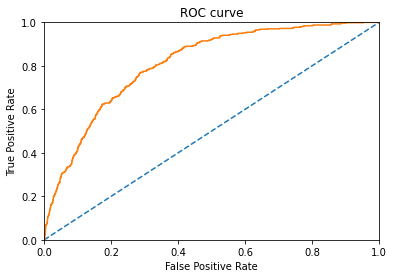

In [94]:
probabilities_valid = classifier_GBC.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid)  # < write code here >

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show() 


In [97]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score, precision_recall_curve
roc_auc = metrics.roc_auc_score(y_valid, probabilities_one_valid)
print(roc_auc)

0.8103541373759602


+ ROC Graph shows us the capability of a model to distinguish between the classes based on the AUC Mean score. The the blue line represents the ROC curve of a random classifier while a good classifier tries to remain as far away from that line as possible. As shown in the graph aboce, the fine-tuned Gradiente Boosting model showcased a higher AUC score (81%).

## Summary

+ Through this project it was complete end-to-end machine learning project using 4 Telco customer Churn datasets that were merges in just one. Project was initiated by cleaning the data and analysing it with visualization techniques, where it was able to extract some information regarding the Telco customers behaviour. In order, to be able to build a machine learning model, categorical data was transformed into numeric variables. After the data transformation, it was tried 7 different machine learning algorithms. After tuning hyperparameters the Gradient Boosting Classifier was chosen has best performance model for the case study, obtaining an ROC AUC score of 81%.

+ It is important to mention that the exact steps of a machine learning task vary by project, and it tends to be iterative process rather than linear process, where steps are often redone as we study more about the study case.